In [120]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import json

plt.rcParams["figure.figsize"] = (15, 5)

from radar import *


In [153]:
scouts = pd.read_csv('./data/scouts.csv')
round1 = pd.read_pickle('./data/round1.bz2')
round2 = pd.read_pickle('./data/round2.bz2')
round3 = pd.read_pickle('./data/round3.bz2')
round4 = pd.read_pickle('./data/round4.bz2')
round5 = pd.read_pickle('./data/round5.bz2')
round6 = pd.read_pickle('./data/round6.bz2')
round1.head()

,apelido,atleta_id,clube,foto,jogos_num,media_num,nome,pontos_num,posicao,preco_num,...,Finalização na trave,Gol,Gol Sofrido,Impedimento,Passe errado,Roubada de Bola,Jogos sem sofrer gols,status_id,variacao_num,team_position
0,Adryelson,91664,Sport,https://s.glbimg.com/es/sde/f/2016/05/01/48632...,0,0.0,Adryelson Shawann Lima Silva,0.0,Zagueiro,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.00,19
1,James Dean,89694,Sport,https://s.glbimg.com/es/sde/f/2017/05/01/c92d5...,0,0.0,James Dean Araújo de Lima,0.0,Atacante,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.00,19
2,Wallace,92078,Sport,https://s.glbimg.com/es/sde/f/2016/05/01/ed088...,0,0.0,Wallace Lucas Aires da Silva,0.0,Atacante,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.00,19
3,Alison,91003,Sport,https://s.glbimg.com/es/sde/f/2017/02/14/cd74f...,0,0.0,Alison Vicente da Silva,0.0,Atacante,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0.00,19
4,Evandro,91001,Sport,https://s.glbimg.com/es/sde/f/2017/05/01/44325...,1,-0.5,Evandro Lima de Oliveira Filho,-0.5,Lateral,0.71,...,NaN,NaN,NaN,NaN,8.0,2.0,NaN,7,-0.29,19


In [139]:
scouts

,scout,text,score
0,RB,Roubada de Bola,1.7
1,FC,Falta cometida,-0.5
2,GC,Gol Contra,-6.0
3,CA,Cartão amarelo,-2.0
4,CV,Cartão Vermelho,-5.0
5,SG,Jogos sem sofrer gols,5.0
6,DD,Defesa Difícil,3.0
7,DP,Defesa de pênalti,7.0
8,GS,Gol Sofrido,-2.0
9,FS,Falta sofrida,0.5


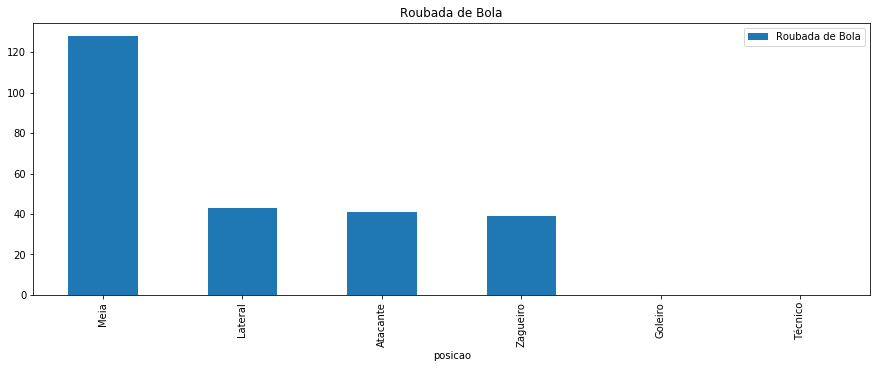

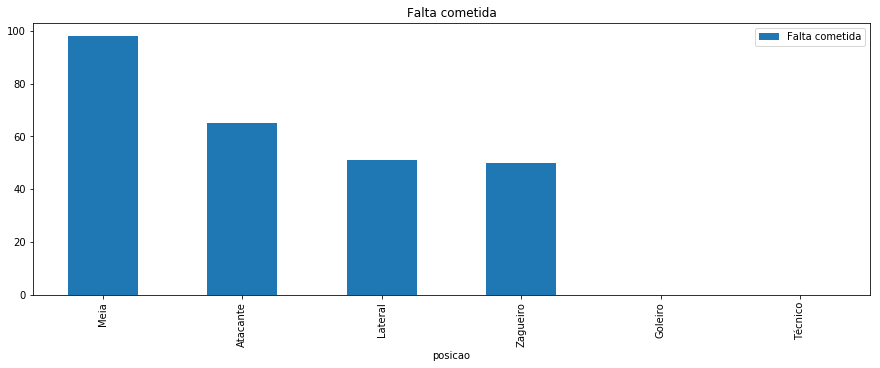

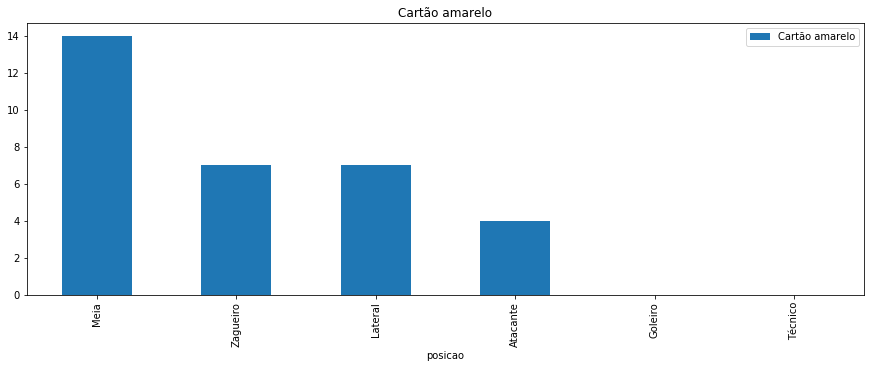

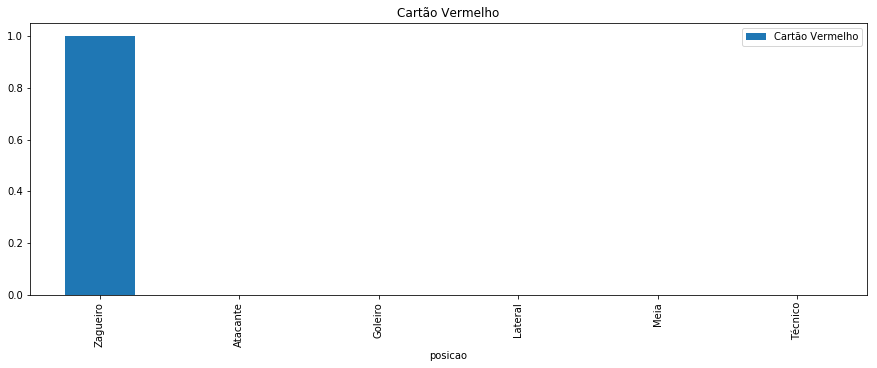

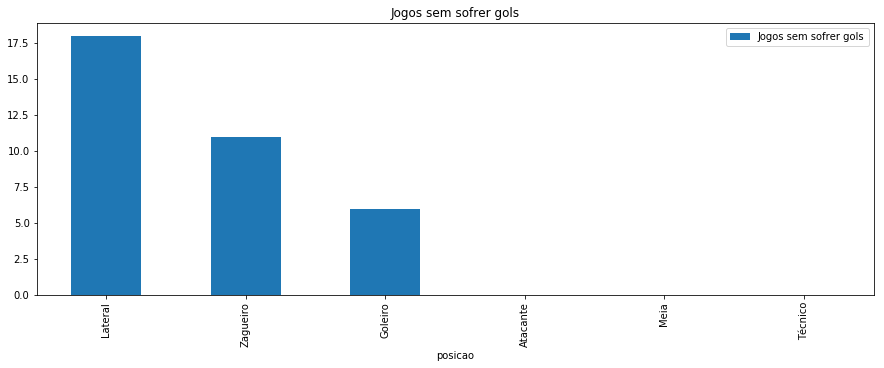

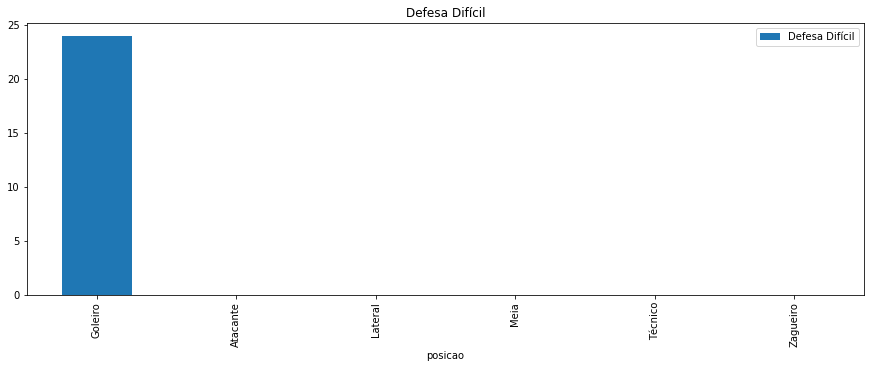

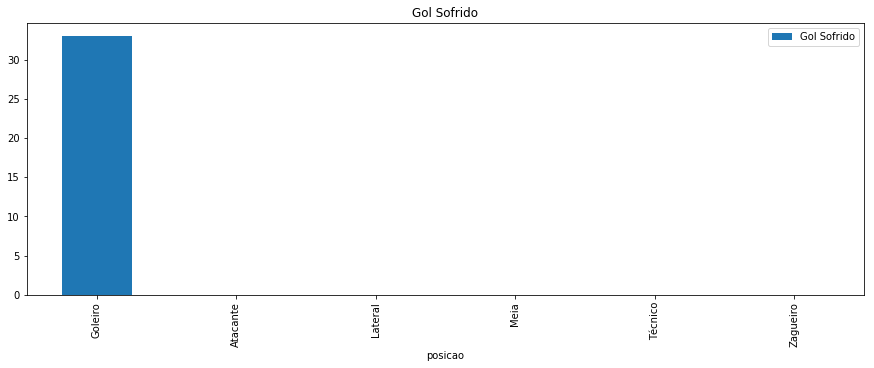

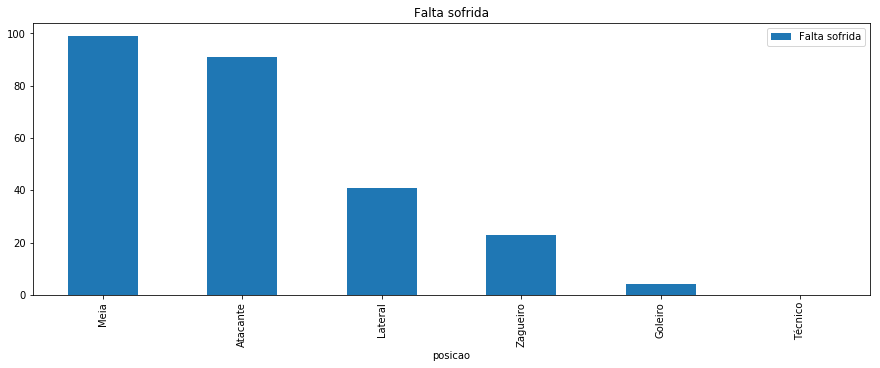

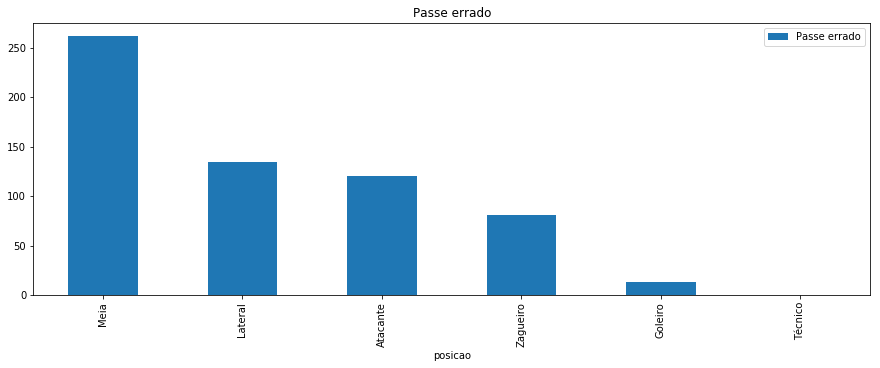

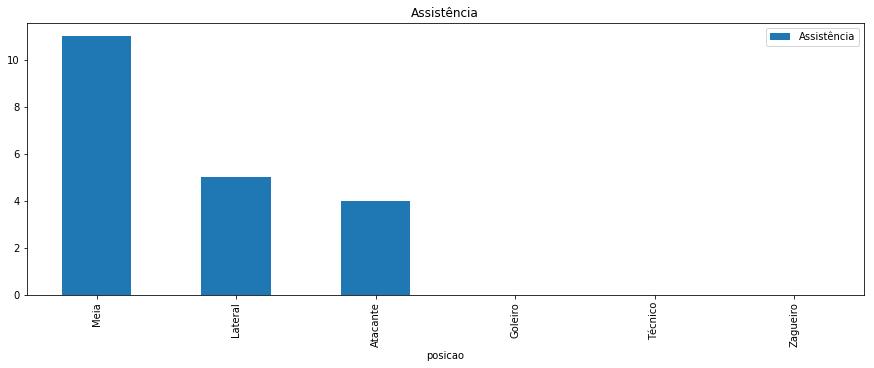

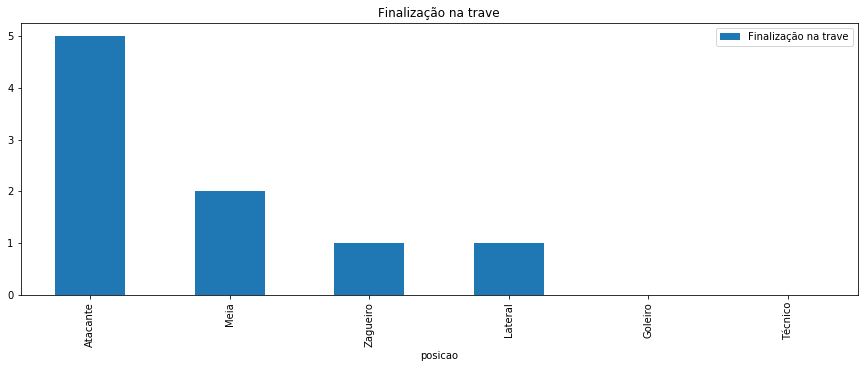

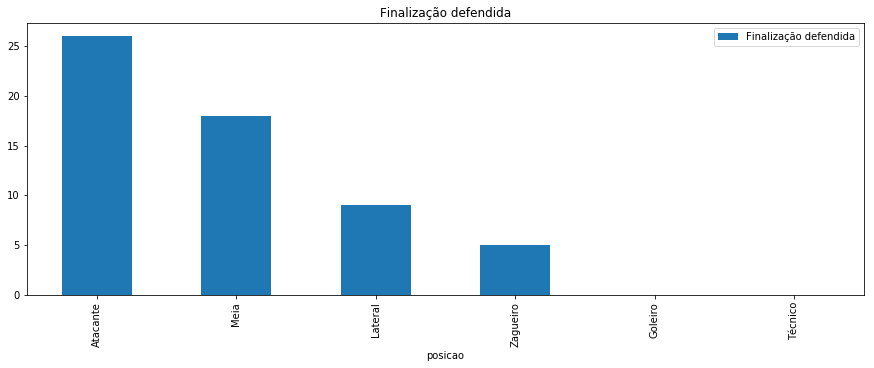

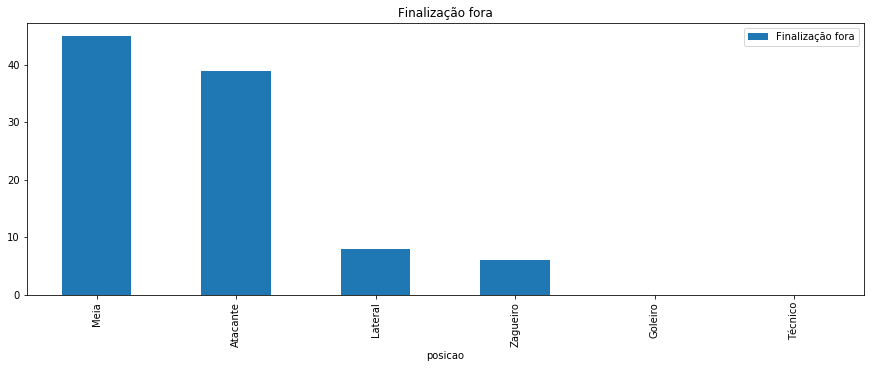

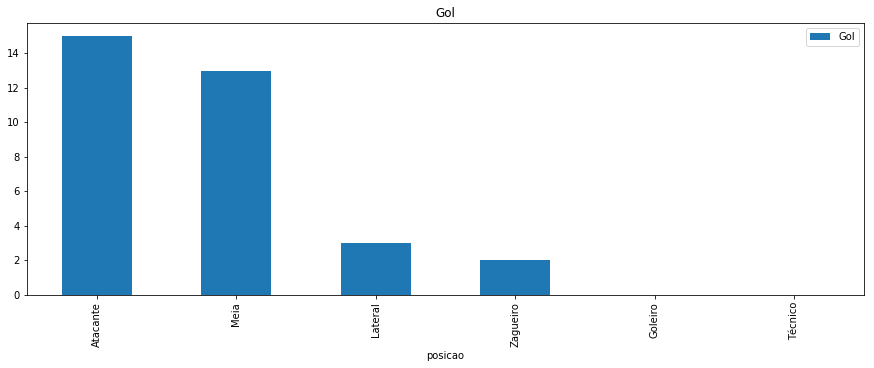

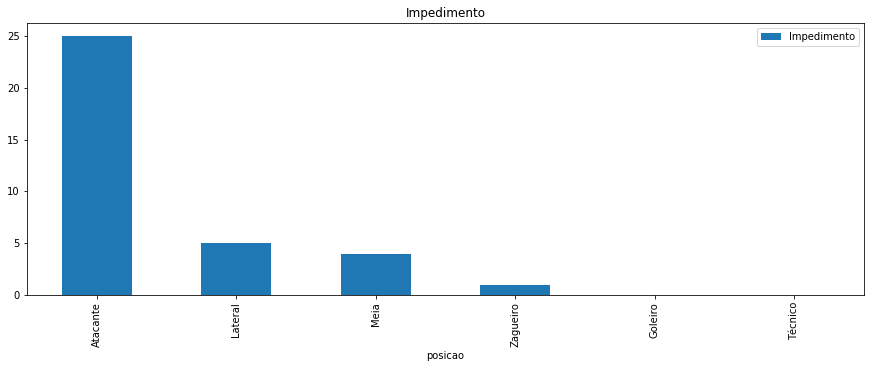

In [152]:

grouping = round1.groupby(['posicao'])

for scout in scouts.text.tolist():
    if scout in round1.keys():
        plt.figure()
        grouping[scout].sum().sort_values(ascending=False).plot.bar()
        plt.title(scout)
        plt.legend()
        

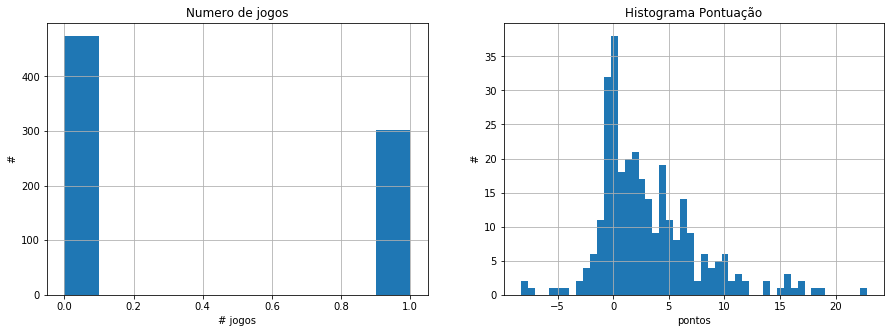

In [5]:
fig, axs = plt.subplots(1,2)
df1['jogos_num'].hist(ax=axs[0])
axs[0].set_title('Numero de jogos')
axs[0].set_xlabel('# jogos')
axs[0].set_ylabel('#')

df1['pontos_num'][df1['jogos_num'] != 0].hist(bins=50, ax=axs[1])
axs[1].set_xlabel('pontos')
axs[1].set_ylabel('#')
axs[1].set_title('Histograma Pontuação')

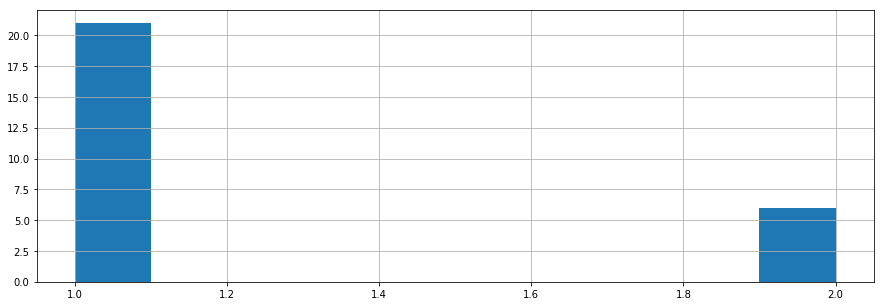

In [7]:
df1['Gol'].hist()

/home/ftruzzi/.virtualenvs/py36/lib/python3.6/site-packages/matplotlib/projections/polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


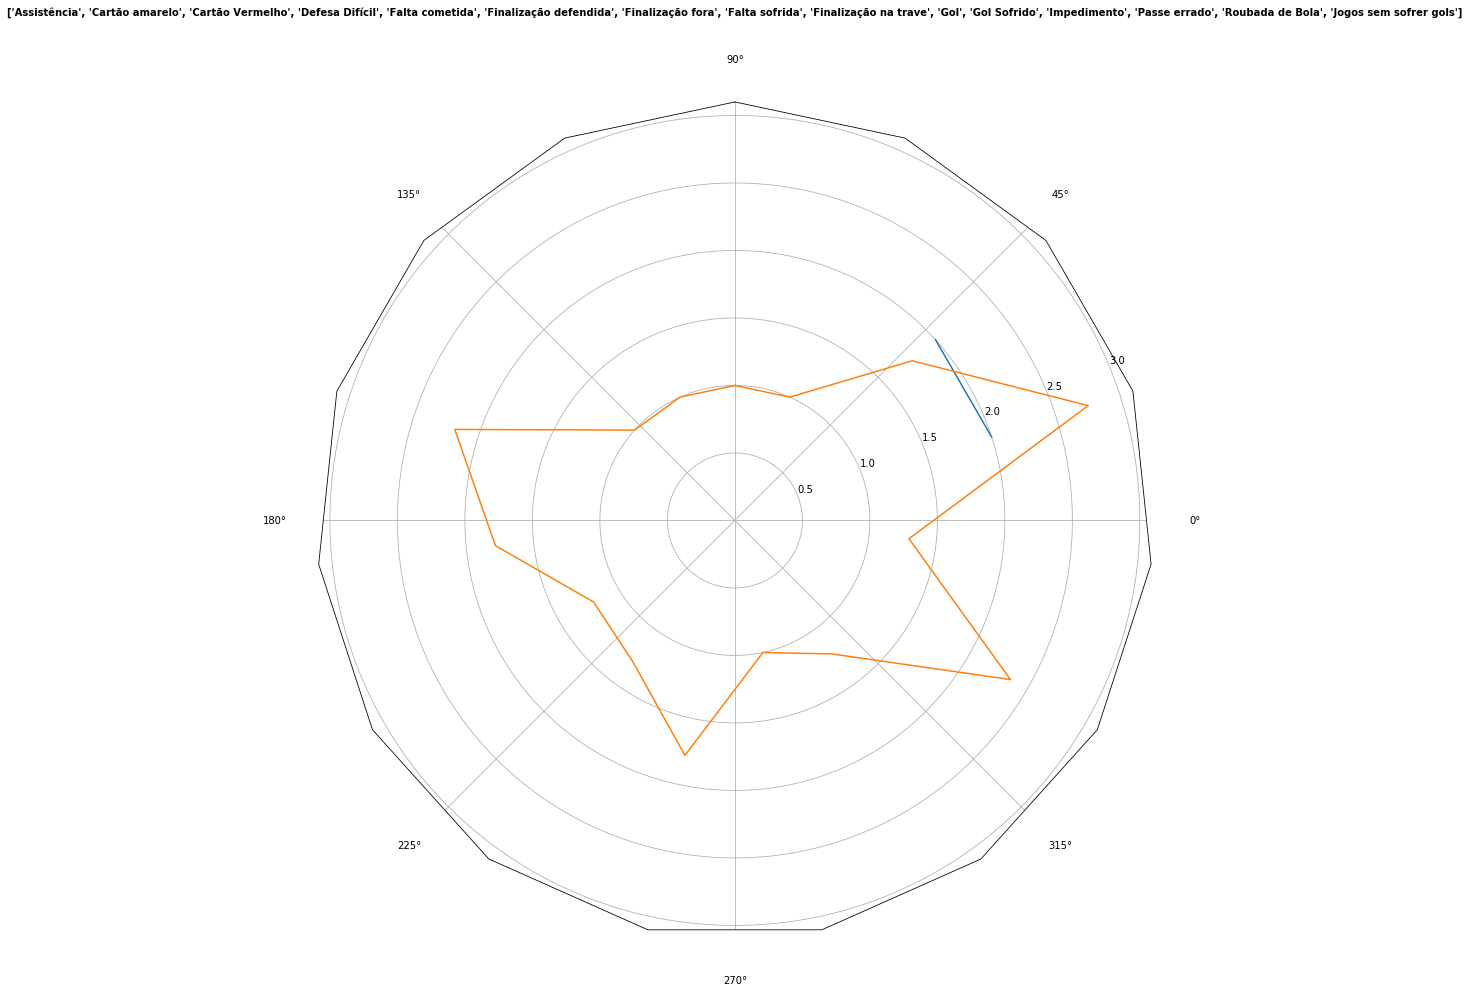

In [6]:
scouts = ['Assistência', 'Cartão amarelo', 'Cartão Vermelho', 'Defesa Difícil',
          'Falta cometida', 'Finalização defendida', 'Finalização fora',
          'Falta sofrida', 'Finalização na trave', 'Gol', 'Gol Sofrido',
          'Impedimento', 'Passe errado', 'Roubada de Bola',
          'Jogos sem sofrer gols']

N = len(scouts)
theta = radar_factory(N, frame='polygon')

fig, axes = plt.subplots(figsize=(N,N), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.25, top=5, bottom=-1.0)
axes.set_title(scouts, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')

axes.plot(theta, df1[scouts].iloc[5])

axes.plot(theta, df1[scouts].mean())

In [163]:
round2.keys()

Index(['apelido', 'atleta_id', 'clube', 'foto', 'jogos_num', 'media_num',
       'nome', 'pontos_num', 'posicao', 'preco_num', 'rodada_id', 'scout',
       'status_id', 'variacao_num', 'team_position'],
      dtype='object')